In [ ]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
import calendar
plt.style.use('seaborn')

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import calendar
plt.style.use('seaborn')

In [6]:

# df = pd.read_csv('data.csv',parse_dates = ['Date'])
df = df[~((df.Date.dt.month == 2) & (df.Date.dt.day == 29))]
df['Year'] = df.Date.dt.year
df['Month-Day'] = df.Date.dt.month.astype('str') + '-' + df.Date.dt.day.astype('str')


In [7]:

df_14 = df[df.Year < 2015].reset_index()
df_15 = df[df.Year == 2015].reset_index()


In [10]:
max_14 = df_14[df_14.Element == 'TMAX'].groupby(['Month-Day']).agg({'Data_Value': max}).reset_index().rename(columns={'Data_Value': 'Daily_Max'})
min_14 = df_14[df_14.Element == 'TMIN'].groupby(['Month-Day']).agg({'Data_Value': min}).reset_index().rename(columns={'Data_Value': 'Daily_Min'})
max_15 = df_15[df_15.Element == 'TMAX'].groupby(['Month-Day']).agg({'Data_Value': max}).reset_index().rename(columns={'Data_Value': 'Daily_Max'})
min_15 = df_15[df_15.Element == 'TMIN'].groupby(['Month-Day']).agg({'Data_Value': max}).reset_index().rename(columns={'Data_Value': 'Daily_Min'})


In [11]:
broken_high = max_15[max_15 > max_14]
broken_low = min_15[min_15 < min_14]

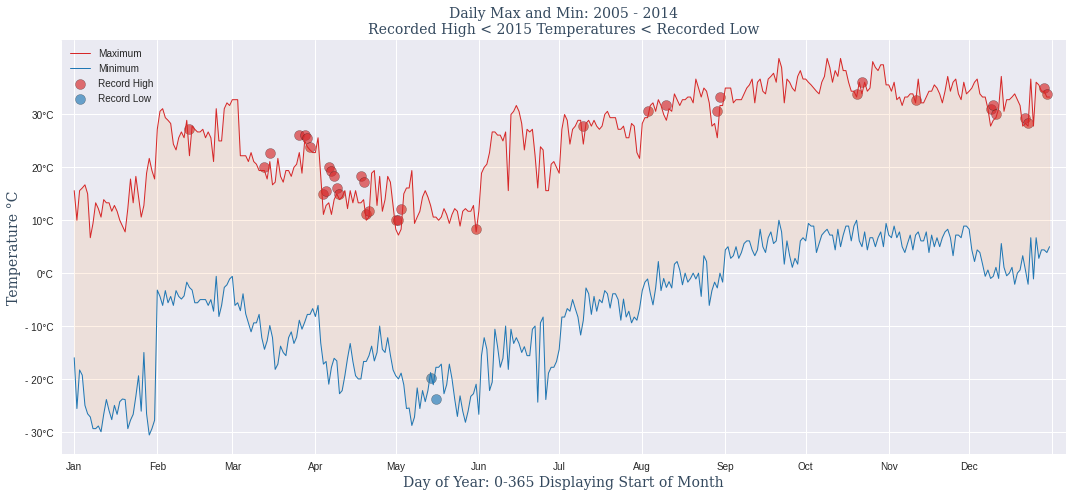

In [25]:
plt.figure(figsize=(15,7))
plt.plot(max_14['Month-Day'],max_14.Daily_Max,linewidth=1, label = 'Maximum', color= 'tab:red')
plt.scatter(broken_high.index,broken_high.Daily_Max,
            label = 'Record High',
#            color= 'tab:red',
            alpha=0.65, 
            edgecolor = 'k',
            c = 'tab:red',
            s = 100)

plt.plot(min_14['Month-Day'],min_14.Daily_Min,linewidth =1, label='Minimum', color='tab:blue')
plt.scatter(broken_low.index, broken_low.Daily_Min, 
            label = 'Record Low',
            color = 'tab:blue',
            alpha = 0.65,
            edgecolor = 'k',
            s = 100)

plt.fill_between(max_14.index, max_14.Daily_Max, min_14.Daily_Min,
                 alpha=0.10,
                 color='tab:orange')

plt.xlim(-5, 370)

# tick locations
ticks=[-5, 0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365, 370]

# tick labels
labels = list(calendar.month_abbr)  # list of months

plt.xticks(ticks=ticks, labels=labels)
labels = ['- 30°C','- 20°C','- 10°C','0°C','10°C','20°C','30°C',]
ticks=[-300,-200,-100,0,100,200,300]
plt.yticks(ticks=ticks, labels=labels)

font = {'family': 'serif',
        'color':  '#34495E',
        'weight': 'normal',
        'size': 14,
        }

plt.legend()
plt.xlabel('Day of Year: 0-365 Displaying Start of Month',fontdict = font)
plt.ylabel('Temperature °C',fontdict = font)
plt.title('Daily Max and Min: 2005 - 2014\nRecorded High < 2015 Temperatures < Recorded Low',
          fontdict = font)
plt.tight_layout()
plt.show()

In [27]:
plt.savefig('pic.png')

<Figure size 576x396 with 0 Axes>